# Technical Report and Inital Data Analysis

In [3]:
import  pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
import math 

df = pd.read_csv(r'Group_Project\incident_event_log.csv') # Your file location here

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

#### Copied and Pasted from the Link to the data set

Link to the data set: https://archive.ics.uci.edu/dataset/498/incident+management+process+enriched+event+log 

1. number: incident identifier (24,918 different values);
2. incident state: eight levels controlling the incident management process transitions from opening until closing the case;
3. active: boolean attribute that shows whether the record is active or closed/canceled;
4. reassignment_count: number of times the incident has the group or the support analysts changed;
5. reopen_count: number of times the incident resolution was rejected by the caller;
6. sys_mod_count: number of incident updates until that moment;
7. made_sla: boolean attribute that shows whether the incident exceeded the target SLA;
8. caller_id: identifier of the user affected;
9. opened_by: identifier of the user who reported the incident;
10. opened_at: incident user opening date and time;
11. sys_created_by: identifier of the user who registered the incident;
12. sys_created_at: incident system creation date and time;
13. sys_updated_by: identifier of the user who updated the incident and generated the current log record;
14. sys_updated_at: incident system update date and time;
15. contact_type: categorical attribute that shows by what means the incident was reported;
16. location: identifier of the location of the place affected;
17. category: first-level description of the affected service;
18. subcategory: second-level description of the affected service (related to the first level description, i.e., to category);
19. u_symptom: description of the user perception about service availability;
20. cmdb_ci: (confirmation item) identifier used to report the affected item (not mandatory);
21. impact: description of the impact caused by the incident (values: 1â€“High; 2â€“Medium; 3â€“Low);
22. urgency: description of the urgency informed by the user for the incident resolution (values: 1â€“High; 2â€“Medium; 3â€“Low);
23. priority: calculated by the system based on 'impact' and 'urgency';
24. assignment_group: identifier of the support group in charge of the incident;
25. assigned_to: identifier of the user in charge of the incident;
26. knowledge: boolean attribute that shows whether a knowledge base document was used to resolve the incident;
27. u_priority_confirmation: boolean attribute that shows whether the priority field has been double-checked;
28. notify: categorical attribute that shows whether notifications were generated for the incident;
29. problem_id: identifier of the problem associated with the incident;
30. rfc: (request for change) identifier of the change request associated with the incident;
31. vendor: identifier of the vendor in charge of the incident;
32. caused_by: identifier of the RFC responsible by the incident;
33. close_code: identifier of the resolution of the incident;
34. resolved_by: identifier of the user who resolved the incident;
35. resolved_at: incident user resolution date and time (dependent variable);
36. closed_at: incident user close date and time (dependent variable).

In [13]:
df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


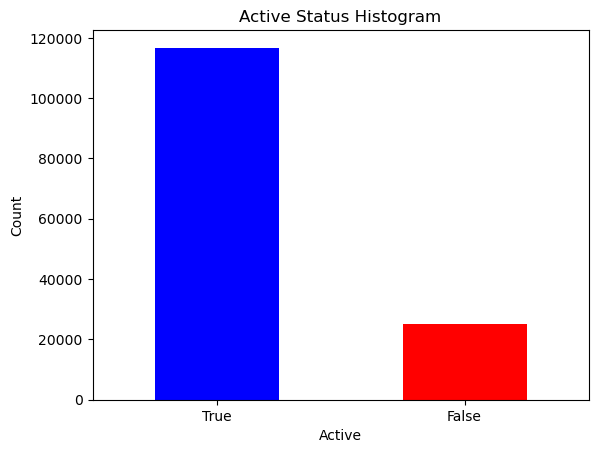

In [30]:
# Plotting
active_counts = df['active'].value_counts()
active_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Active Status Histogram')
plt.xlabel('Active')
plt.ylabel('Count')
plt.xticks(rotation=0)  # To keep the x-axis labels horizontal
plt.show()

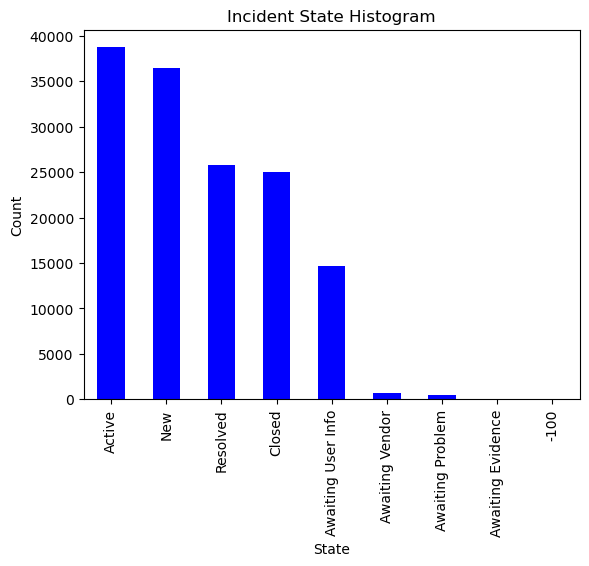

<Figure size 1000x1000 with 0 Axes>

In [31]:
incident = df['incident_state'].value_counts()
incident.plot(kind='bar', color=['blue'])
plt.title('Incident State Histogram')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90) # To keep the x-axis labels horizontal
plt.figure(figsize=(10, 10))
plt.show()

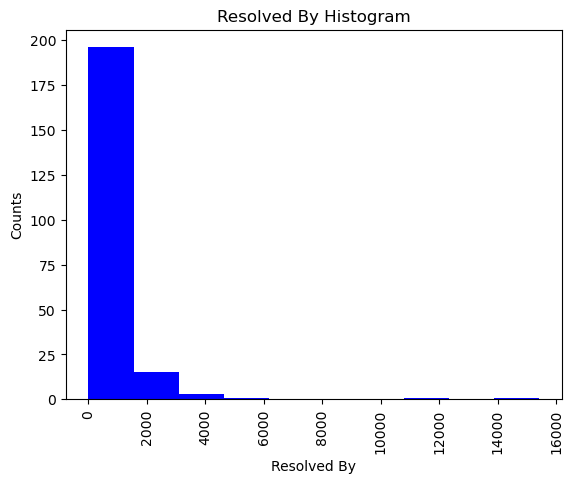

In [36]:
resolve = df['resolved_by'].value_counts()
resolve.plot(kind='hist', color=['blue'])
plt.title('Resolved By Histogram')
plt.xlabel('Resolved By')
plt.ylabel('Counts')
plt.xticks(rotation=90)  # To keep the x-axis labels horizontal
plt.show()